In [1]:
"""
Diseñar un filtro rechaza banda digital IIR,
usando una función H(s) prototipo de primer orden, para filtrar el ruido de 50Hz de la señal de ECG.
Usar el método de transformaciones prototipo. Usar un factor de calidad de Q > 20.


"""

'\nDiseñar un filtro rechaza banda digital IIR,\nusando una función H(s) prototipo de primer orden, para filtrar el ruido de 50Hz de la señal de ECG.\nUsar el método de transformaciones prototipo. Usar un factor de calidad de Q > 20.\n\n\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
file = open('ecg.txt','r')
openedFile = file.read().replace('\n',' ')

data_str = openedFile.split(' ')
data_num = list(map(int,data_str))

#Tamaño del registro
TR = len(data_num)
raw_signal = np.zeros(int(TR/2))
filt_signal = np.zeros(int(TR/2))

#separar señales a partir de los datos del registro
i = 0
j = 0
while (j< TR):
  raw_signal[i] = data_num[j]
  filt_signal[i] = data_num[j+1]
  j += 2
  i += 1


# Normalizar la señal entre 0 y 1
raw_signal_min = np.min(raw_signal)
raw_signal_max = np.max(raw_signal)
raw_signal_norm = (raw_signal - raw_signal_min) / (raw_signal_max - raw_signal_min)

filt_signal_min = np.min(filt_signal)
filt_signal_max = np.max(filt_signal)
filt_signal_norm = (filt_signal - filt_signal_min) / (filt_signal_max - filt_signal_min)


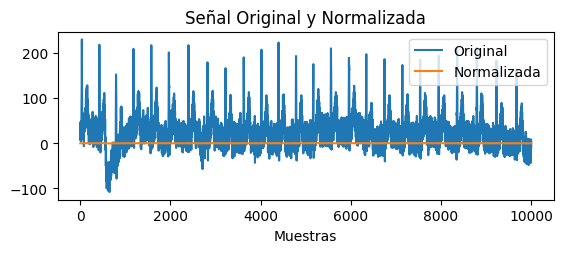

In [4]:
# Graficar señales originales y normalizadas
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(raw_signal, label='Original')
plt.plot(raw_signal_norm, label='Normalizada')
plt.title("Señal Original y Normalizada")
plt.xlabel("Muestras")
plt.legend()

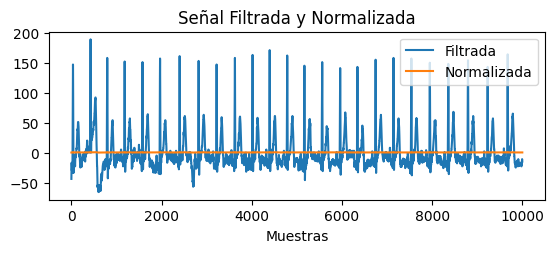

In [5]:
plt.subplot(2, 1, 2)
plt.plot(filt_signal, label='Filtrada')
plt.plot(filt_signal_norm, label='Normalizada')
plt.title("Señal Filtrada y Normalizada")
plt.xlabel("Muestras")
plt.legend()

In [6]:
# Extraer un pulso de la señal
signal_n = raw_signal[5800:6200]
signal_norm = raw_signal_norm[5800:6200]

# Tamaño en muestras del pulso
M = len(signal_n)
# Frecuencia de muestreo
fs = 500
# Periodo de muestreo
ts = 1/fs
# Vector de tiempos
t = np.arange(0, M*ts, ts)
# Condición de periodicidad
signal_n[-1] = signal_n[0]
signal_norm[-1] = signal_norm[0]

Text(0.5, 0, 'Tiempo (seg)')

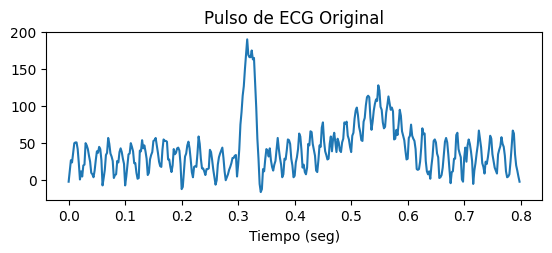

In [7]:
# Gráfica del pulso original y normalizado
plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(t, signal_n)
plt.title("Pulso de ECG Original")
plt.xlabel("Tiempo (seg)")



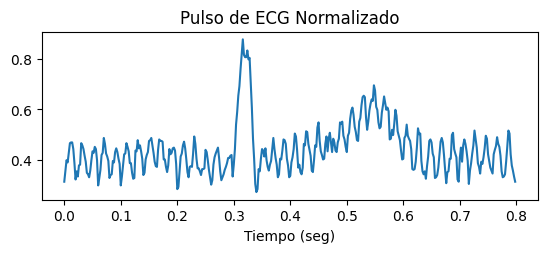

In [8]:
plt.subplot(2, 1, 2)
plt.plot(t, signal_norm)
plt.title("Pulso de ECG Normalizado")
plt.xlabel("Tiempo (seg)")
plt.show()

In [9]:
#Analisis en frecuencia de la señal
Xdft = np.abs(np.fft.fft(signal_norm))

In [10]:
#Tamaño de la señal de audio
N= len(signal_norm)

In [11]:
N

400

In [12]:
#Frecuencia de los componentes
n = np.arange(0,N,dtype='float')
f = n*fs/N

In [13]:
#Determinal la mitad de muestras
mod = N%2
if mod == 0:
  end = int(N/2)
else:
  end = int((N-1)/2)

Text(0.5, 0, 'Frecuencia en Hertz')

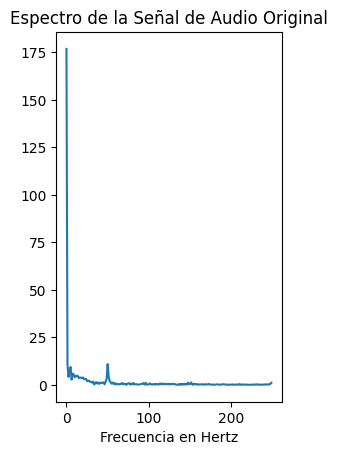

In [14]:
#Grafical el espectro de la señal del audio
plt.figure(2)
plt.subplot(1,2,1)
plt.plot(f[0:end],Xdft[0:end])
plt.title("Espectro de la Señal de Audio Original")
plt.xlabel("Frecuencia en Hertz")

In [15]:
#Filtro Analógico H(s) = s^2+(100pi)^2/s^2 +2s +(100pi)^2
num = [1,0,(100*np.pi)**2]
den = [1,2,(100*np.pi)**2]

In [16]:
from scipy.signal import freqs
#Respuesta en frecuencia del filtro analogico pasa altas
w,Hw = freqs(num,den)

In [17]:
#Convierte w (rad/seg) a Hertz
fhz = w/(2*np.pi)

In [18]:
Hwm = np.abs(Hw)

Text(0.5, 0, 'Frecuencia en Hertz')

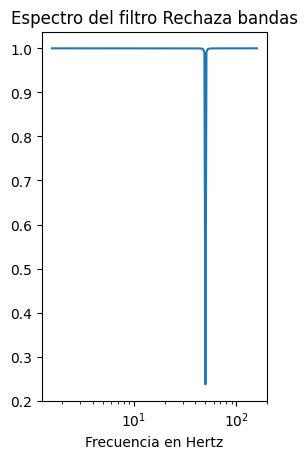

In [19]:
#Grafica del espectro del filtro analogico
plt.figure(3)
plt.subplot(1,2,1)
plt.semilogx(fhz,Hwm)
plt.title("Espectro del filtro Rechaza bandas")
plt.xlabel("Frecuencia en Hertz")

In [31]:
#Filtro digital IIR pasa altas H(z) = z-1/(1+5400*pi*ts)z+(5400*pi*ts-1)
numz = [(2/ts)**2,0,(100*np.pi)**2]
denz = [(2/ts)**2,2*(2/ts),(100*np.pi)**2]

In [32]:
from scipy.signal import freqz
#Respuesta en frecuecnia del filtro digital
wz,Hwz = freqz(numz,denz)
#convierte frecuencia de rad/seg a Hz
F = wz/(2*np.pi)
#convierte frecuencia normalizada a Hz
fz = F*fs
#obtiene modulo de la magnitud Hw
Hww = np.abs(Hwz)

Text(0.5, 0, 'frecuencia en hertz')

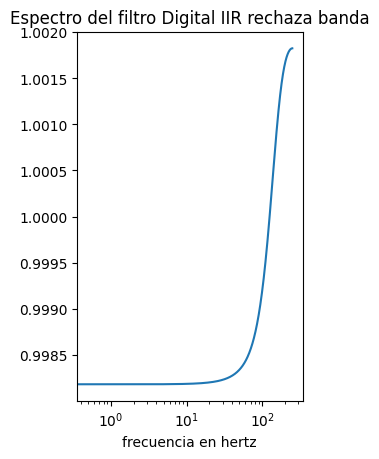

In [33]:
#Grafica del espectro del filtro digital
plt.figure(3)
plt.subplot(1,2,2)
plt.semilogx(fz,Hww)
plt.title("Espectro del filtro Digital IIR rechaza banda")
plt.xlabel("frecuencia en hertz")

In [34]:
from scipy.signal import lfilter
#Filtrado de la señal
signal_filtered = lfilter(numz,denz,signal_norm)

In [35]:
#Analisis de la frecuencia de la señal filtrada
Xdftf = np.abs(np.fft.fft(signal_filtered))

Text(0.5, 0, 'Frecuencia en Hertz')

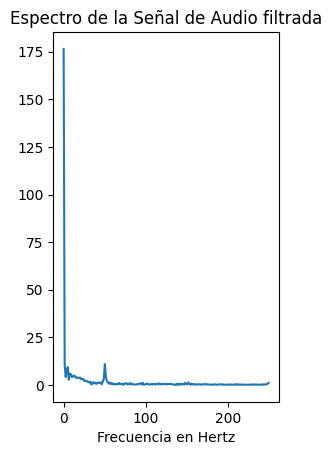

In [36]:
#Grafical el espectro de la señal del audio
plt.figure(2)
plt.subplot(1,2,2)
plt.plot(f[0:end],Xdftf[0:end])
plt.title("Espectro de la Señal de Audio filtrada")
plt.xlabel("Frecuencia en Hertz")

Text(0.5, 0, 'Muestras de la señal')

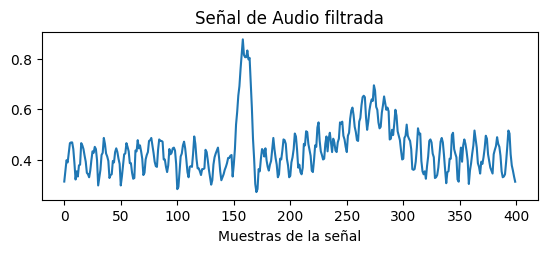

In [37]:
#Gráfica de la señal de audio filtrada
plt.figure(1)
plt.subplot(2,1,2)
plt.plot(signal_filtered)
plt.title("Señal de Audio filtrada")
plt.xlabel("Muestras de la señal")